In [1]:
#invite people for the Kaggle party
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
from make_dataset import renamed_columns_en, process_raw, clean_na, make_dataset, abbreviation
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#bring in the six packs
df_train = pd.read_csv('/Users/ameyadange/Documents/GitHub/markov_weather/archive/central_west.csv')

In [3]:
abs = abbreviation
print(abs)

['date', 'hour', 'prcp', 'stp', 'smax', 'smin', 'gbrd', 'temp', 'dewp', 'tmax', 'tmin', 'dmax', 'dmin', 'hmax', 'hmin', 'hmdy', 'wdct', 'gust', 'wdsp', 'regi', 'prov', 'wsnm', 'inme', 'lat', 'lon', 'elvt']


In [4]:
#changing column names
if len(abs)<27:
    abs.insert(0, "index")
df_train.columns = abs
print(abs)

['index', 'date', 'hour', 'prcp', 'stp', 'smax', 'smin', 'gbrd', 'temp', 'dewp', 'tmax', 'tmin', 'dmax', 'dmin', 'hmax', 'hmin', 'hmdy', 'wdct', 'gust', 'wdsp', 'regi', 'prov', 'wsnm', 'inme', 'lat', 'lon', 'elvt']


In [5]:
#check the decoration

df_train.columns

Index(['index', 'date', 'hour', 'prcp', 'stp', 'smax', 'smin', 'gbrd', 'temp',
       'dewp', 'tmax', 'tmin', 'dmax', 'dmin', 'hmax', 'hmin', 'hmdy', 'wdct',
       'gust', 'wdsp', 'regi', 'prov', 'wsnm', 'inme', 'lat', 'lon', 'elvt'],
      dtype='object')

In [6]:
num_rows = len(df_train['tmax'])

In [7]:
df_train.replace(-9999, np.nan, inplace=True)

In [8]:
new_df = pd.DataFrame({col: [] for col in abbreviation})
new_df.columns

Index(['index', 'date', 'hour', 'prcp', 'stp', 'smax', 'smin', 'gbrd', 'temp',
       'dewp', 'tmax', 'tmin', 'dmax', 'dmin', 'hmax', 'hmin', 'hmdy', 'wdct',
       'gust', 'wdsp', 'regi', 'prov', 'wsnm', 'inme', 'lat', 'lon', 'elvt'],
      dtype='object')

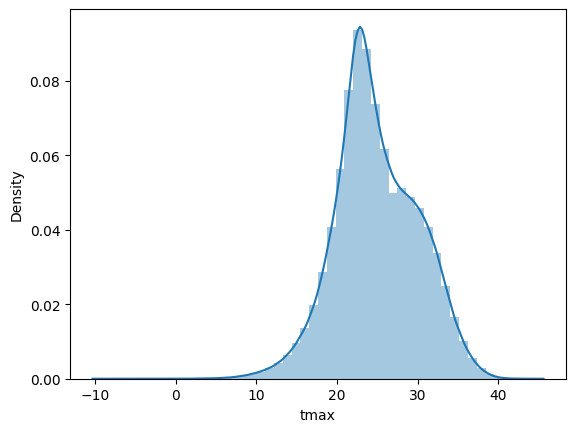

In [9]:
#histogram
sns.distplot(df_train['tmax']);

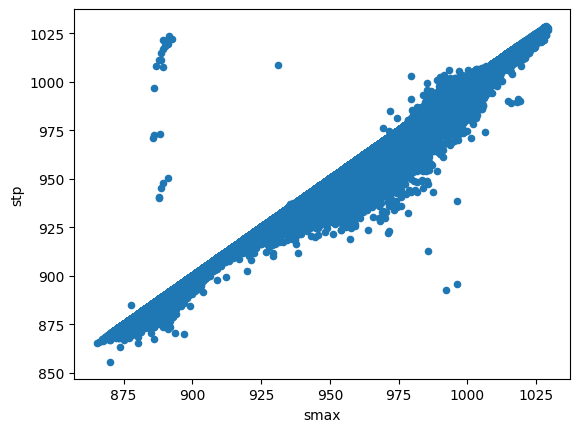

In [10]:
#Atmospheric pressure vs pmax   (Remove outliers)
var = 'smax'
data = pd.concat([df_train['stp'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='stp');

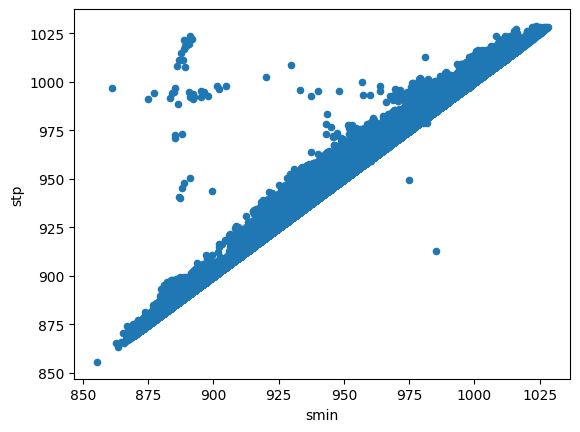

In [11]:
#Atmospheric pressure vs pmin   (Remove outliers)
var = 'smin'
data = pd.concat([df_train['stp'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='stp');

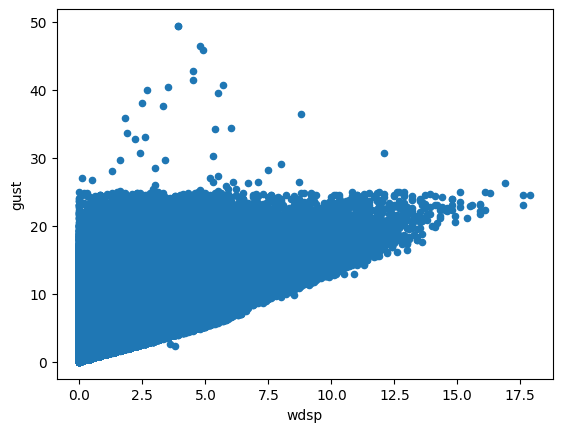

In [12]:
#wind speed vs gust speed (remove outliers)

var = 'wdsp'
data = pd.concat([df_train['gust'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='gust');

In [13]:
gust_out_liers = []
for i in range(num_rows):
    if df_train['gust'][i] > 26:
        gust_out_liers.append(i)

new_df = df_train.drop(gust_out_liers)
new_df = new_df.reset_index(drop=True)


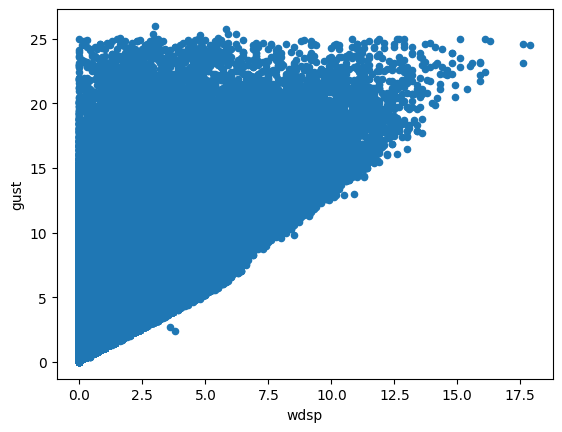

In [14]:
#wind speed vs gust speed (remove outliers)

var = 'wdsp'
data = pd.concat([new_df['gust'], new_df[var]], axis=1)
data.plot.scatter(x=var, y='gust');

In [15]:
stp_smax_out_liers = []
num_rows = len(new_df['tmax'])
for i in range(num_rows):
    if new_df['stp'][i] > new_df['smax'][i] + 25:
        stp_smax_out_liers.append(i)
    elif new_df['stp'][i] < new_df['smax'][i] - 70:
        stp_smax_out_liers.append(i)

new_df = new_df.drop(stp_smax_out_liers)
new_df = new_df.reset_index(drop=True)

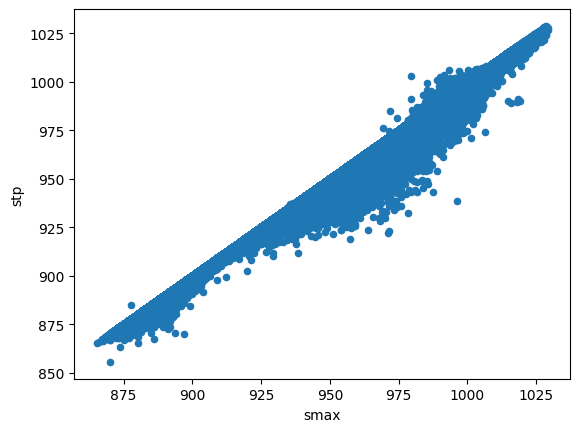

In [16]:
#Atmospheric pressure vs pmax   (Remove outliers)
var = 'smax'
data = pd.concat([new_df['stp'], new_df[var]], axis=1)
data.plot.scatter(x=var, y='stp');

In [17]:
stp_smin_out_liers = []
num_rows = len(new_df['tmax'])
for i in range(num_rows):
    y = new_df['stp'][i]
    x = new_df['smin'][i]
    if y > x + 40:
        stp_smin_out_liers.append(i)
    elif y < x - 10:
        stp_smin_out_liers.append(i)

new_df = new_df.drop(stp_smin_out_liers)
new_df = new_df.reset_index(drop=True)

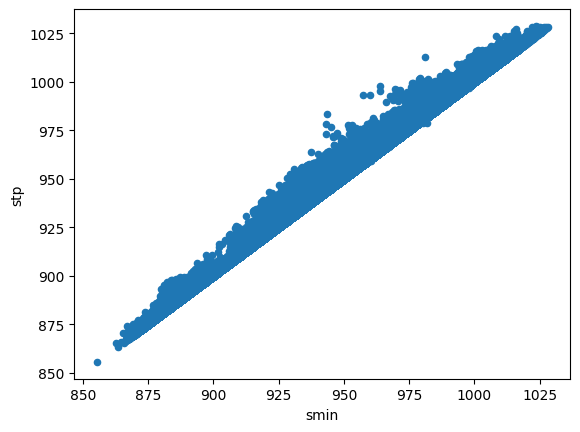

In [18]:
#Atmospheric pressure vs pmin   (Remove outliers)
var = 'smin'
data = pd.concat([new_df['stp'], new_df[var]], axis=1)
data.plot.scatter(x=var, y='stp');

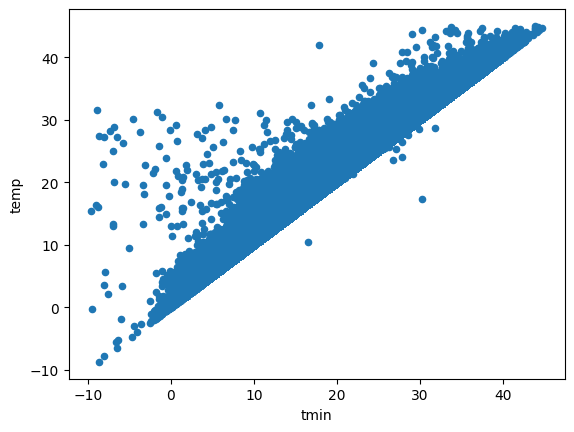

In [19]:
#temp vs tmin   (Remove outliers)
var = 'tmin'
data = pd.concat([new_df['temp'], new_df[var]], axis=1)
data.plot.scatter(x=var, y='temp');

In [20]:
temp_tmin_out_liers = []
num_rows = len(new_df['tmax'])
for i in range(num_rows):
    y = new_df['temp'][i]
    x = new_df['tmin'][i]
    if y > x + 18:
        temp_tmin_out_liers.append(i)
    elif y < x - 5:
        temp_tmin_out_liers.append(i)

new_df = new_df.drop(temp_tmin_out_liers)
new_df = new_df.reset_index(drop=True)

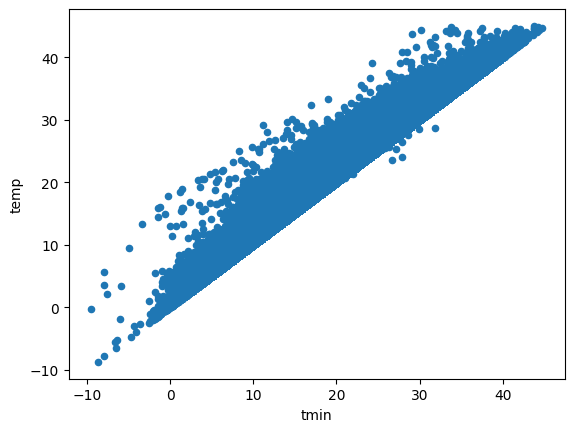

In [21]:
#temp vs tmin   (Remove outliers)
var = 'tmin'
data = pd.concat([new_df['temp'], new_df[var]], axis=1)
data.plot.scatter(x=var, y='temp');

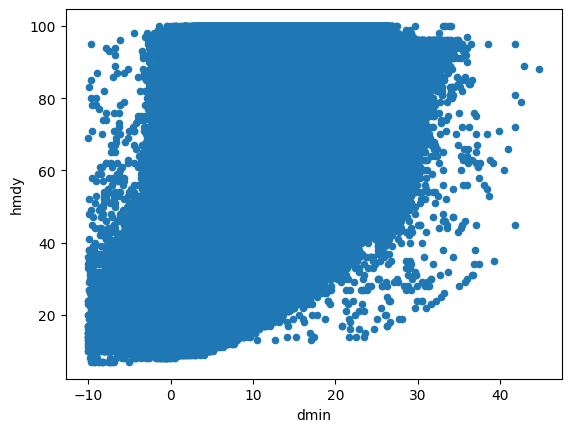

In [22]:
#hmdy vs dmin   (Remove outliers)
var = 'dmin'
data = pd.concat([new_df['hmdy'], new_df[var]], axis=1)
data.plot.scatter(x=var, y='hmdy');

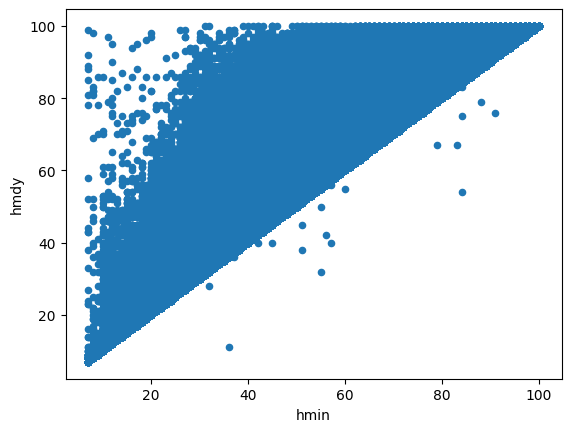

In [23]:
#hmdy vs hmin   (Remove outliers)
var = 'hmin'
data = pd.concat([new_df['hmdy'], new_df[var]], axis=1)
data.plot.scatter(x=var, y='hmdy');

In [24]:
hmdy_hmin_out_liers = []
num_rows = len(new_df['tmax'])
for i in range(num_rows):
    y = new_df['hmdy'][i]
    x = new_df['hmin'][i]
    if y > x + 70:
        hmdy_hmin_out_liers.append(i)
    elif y < x - 5:
        hmdy_hmin_out_liers.append(i)

new_df = new_df.drop(hmdy_hmin_out_liers)
new_df = new_df.reset_index(drop=True)

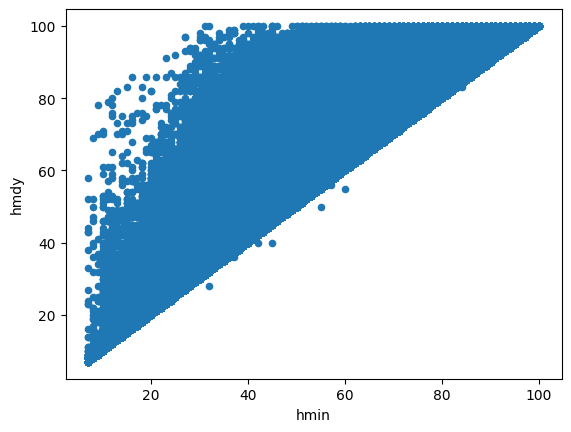

In [25]:
#hmdy vs hmin   (Remove outliers)
var = 'hmin'
data = pd.concat([new_df['hmdy'], new_df[var]], axis=1)
data.plot.scatter(x=var, y='hmdy');

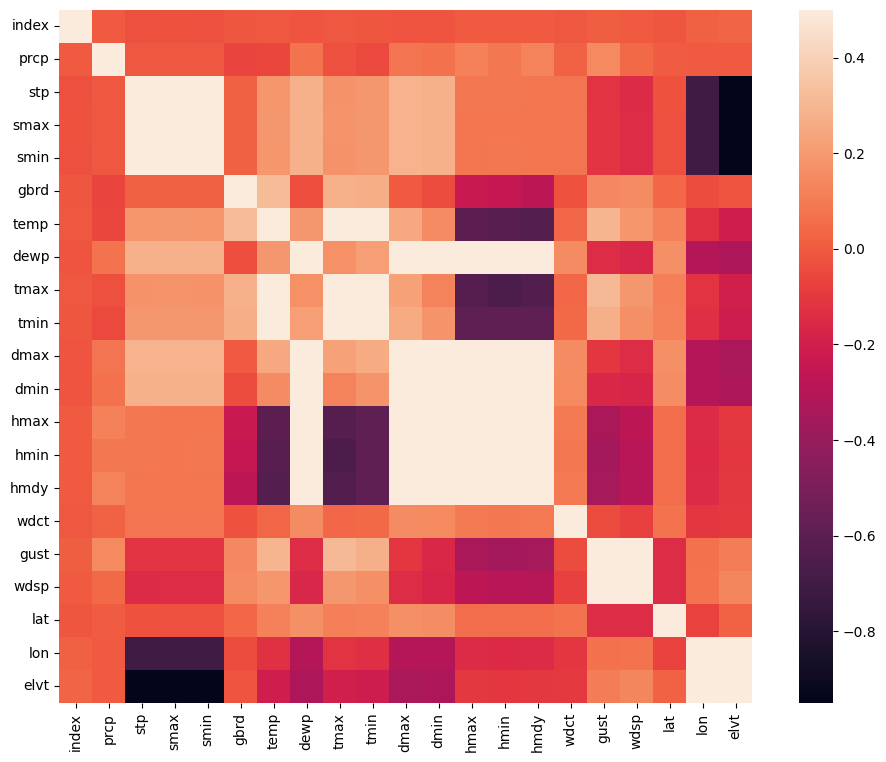

In [27]:
#correlation matrix (numeric columns only)
numeric_df = df_train.select_dtypes(include=[np.number])
corrmat = numeric_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.5, square=True);

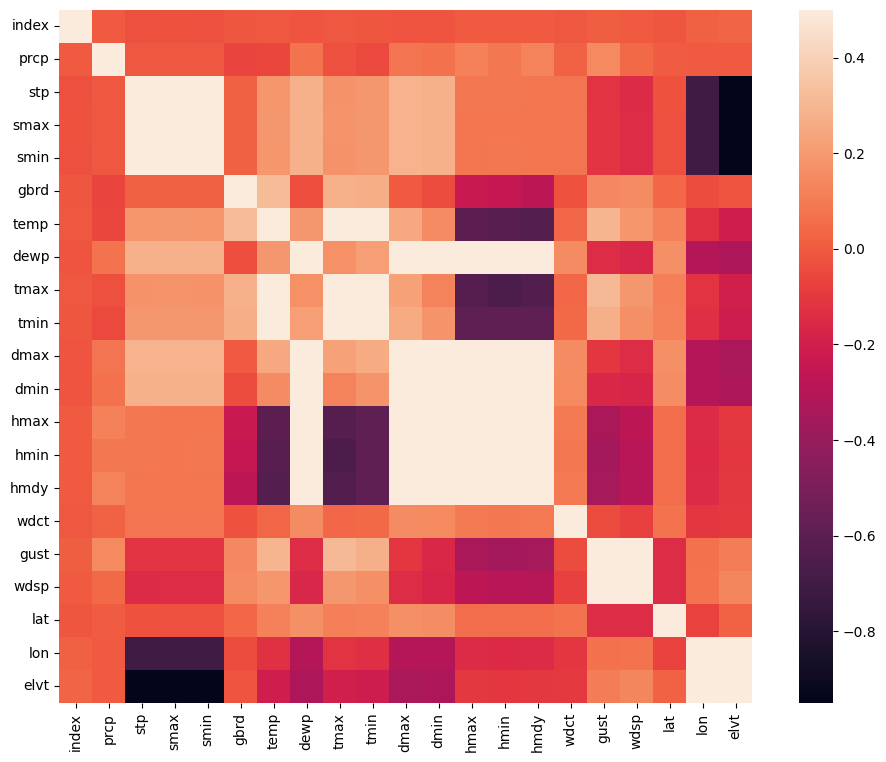

In [29]:
numeric_new_df = new_df.select_dtypes(include=[np.number])
corrmat = numeric_new_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.5, square=True);

In [30]:
missing_percentages = new_df.isna().mean() * 100
print(missing_percentages)

index     0.000000
date      0.000000
hour      0.000000
prcp     17.834513
stp      13.565030
smax     13.602529
smin     13.611018
gbrd     53.161259
temp     13.022076
dewp     14.786355
tmax     13.083772
tmin     13.091219
dmax     14.812206
dmin     14.870594
hmax     14.728815
hmin     14.773630
hmdy     14.684516
wdct     14.866507
gust     14.202077
wdsp     14.097027
regi      0.000000
prov      0.000000
wsnm      0.000000
inme      0.000000
lat       0.000000
lon       0.000000
elvt      0.000000
dtype: float64


In [31]:
df_mean =  new_df.drop(['index', 'hour', 'gbrd', 'smax', 'smin', 'tmin', 'tmax', 'dmax', 'dmin', 'hmax', 'hmin', 'dewp', 'gust'], axis=1)
#df_mean =  df_mean.groupby(['date', 'inme', 'regi', 'prov', 'wsnm', 'lat', 'lon', 'elvt'])[['prcp', 'temp', 'hmdy', 'wdct', 'wdsp', 'stp']].mean()
df_mean = df_mean.groupby(['date', 'inme', 'regi', 'prov', 'wsnm', 'lat', 'lon', 'elvt']).agg({'prcp': 'mean', 'stp': 'mean', 'temp': 'mean', 'hmdy': 'mean', 'wdct': 'mean', 'wdsp': 'mean'}).reset_index()

In [32]:
missing_percentages = df_mean.isna().mean() * 100
print(missing_percentages)

date     0.000000
inme     0.000000
regi     0.000000
prov     0.000000
wsnm     0.000000
lat      0.000000
lon      0.000000
elvt     0.000000
prcp    14.479659
stp      9.634134
temp     9.073152
hmdy    10.292147
wdct    10.949111
wdsp    10.157310
dtype: float64


In [33]:
df_sorted = df_mean.sort_values(by=['inme', 'date'])

In [34]:
df_interpolated = df_sorted.interpolate()
missing_percentages = df_interpolated.isna().mean() * 100
print(missing_percentages)

date    0.0
inme    0.0
regi    0.0
prov    0.0
wsnm    0.0
lat     0.0
lon     0.0
elvt    0.0
prcp    0.0
stp     0.0
temp    0.0
hmdy    0.0
wdct    0.0
wdsp    0.0
dtype: float64


In [35]:
df_interpolated.to_csv('/Users/ameyadange/Documents/GitHub/markov_weather/archive/central_west_new.csv', index=False)

In [36]:
print("hi")

hi
